In [ ]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3916a932846949bb9a96a80ea7178ab2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [57]:
import pandas as pd
#I wanted to see all the rows, column and decimal numbers up to 5 decimal places
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' %x )

In [51]:
df = pd.json_normalize(data['data'])
df['time_stamp'] = pd.to_datetime('now')


In [45]:
def api_runner():
    global df
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3916a932846949bb9a96a80ea7178ab2',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #I used this to create a new time_stamp column
    df = pd.json_normalize(data['data'])
    df['time_stamp'] = pd.to_datetime('now')
  
    
    #I used this to create a csv file and appended data to it
    if not os.path.isfile(r'C:\Users\IZOSE  OMELIME\Downloads\python\API.csv'):
        df.to_csv(r'C:\Users\IZOSE  OMELIME\Downloads\python\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\IZOSE  OMELIME\Downloads\python\API.csv', mode = 'a', header = False)

In [85]:
import os
import sys
from time import time
from time import sleep
from requests import Session

for i in range(333):
    api_runner()
    print('successful')
    sleep(60)
exit()

successful
successful


KeyboardInterrupt: 

In [86]:
df4 = pd.read_csv(r'C:\Users\IZOSE  OMELIME\Downloads\python\API.csv')
#Read into the csv to ensure it worked


In [90]:

# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.69309,-2.97909,-8.69898,-18.69684,-10.63363,-14.72425
Ethereum,-1.31911,-4.73924,-15.55365,-28.01852,-25.07863,-23.05760
Tether USDt,-0.00148,-0.03024,-0.01608,-0.07284,-0.03531,-0.05811
XRP,-0.87770,-5.28854,-12.69748,-24.45676,-26.05957,-34.58051
BNB,-1.23816,-1.31481,-12.93763,-28.03081,7.46896,15.58917
Solana,-1.26005,-4.01628,-18.20101,-31.19320,-28.64436,-15.94919
USDC,-0.00250,-0.02699,-0.01012,-0.01248,-0.03019,-0.03598
TRON,-0.44692,-0.97229,-3.79925,-15.89318,-14.79058,-15.67847
Dogecoin,-1.02518,0.25796,-11.87948,-34.69399,-30.07186,-31.35502


In [93]:

#I wannted to trasnpose the columns to rows
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      -0.69309
              quote.USD.percent_change_24h     -2.97909
              quote.USD.percent_change_7d      -8.69898
              quote.USD.percent_change_30d    -18.69684
              quote.USD.percent_change_60d    -10.63363
              quote.USD.percent_change_90d    -14.72425
Ethereum      quote.USD.percent_change_1h      -1.31911
              quote.USD.percent_change_24h     -4.73924
              quote.USD.percent_change_7d     -15.55365
              quote.USD.percent_change_30d    -28.01852
              quote.USD.percent_change_60d    -25.07863
              quote.USD.percent_change_90d    -23.05760
Tether USDt   quote.USD.percent_change_1h      -0.00148
              quote.USD.percent_change_24h     -0.03024
              quote.USD.percent_change_7d      -0.01608
              quote.USD.percent_change_30d     -0.07284
              quote.USD.percent_change_60d     -0.03531
     

In [94]:
type(df4)

pandas.core.series.Series

In [132]:
df5 = df4.to_frame(name = 'values')
df5
#converted the panda series into a DataFrame

values
name                                                
Bitcoin      quote.USD.percent_change_1h    -0.69309
             quote.USD.percent_change_24h   -2.97909
             quote.USD.percent_change_7d    -8.69898
             quote.USD.percent_change_30d  -18.69684
             quote.USD.percent_change_60d  -10.63363
             quote.USD.percent_change_90d  -14.72425
Ethereum     quote.USD.percent_change_1h    -1.31911
             quote.USD.percent_change_24h   -4.73924
             quote.USD.percent_change_7d   -15.55365
             quote.USD.percent_change_30d  -28.01852
             quote.USD.percent_change_60d  -25.07863
             quote.USD.percent_change_90d  -23.05760
Tether USDt  quote.USD.percent_change_1h    -0.00148
             quote.USD.percent_change_24h   -0.03024
             quote.USD.percent_change_7d    -0.01608
             quote.USD.percent_change_30d   -0.07284
             quote.USD.percent_change_60d   -0.03531
             quote.USD.percent_change_90d   -0.05811
XRP          quote.USD.percent_change_1h    -0.87770
             quote.USD.percent_change_24h   -5.28854
             quote.USD.percent_change_7d   -12.69748
             quote.USD.percent_change_30d  -24.45676
             quote.USD.percent_change_60d  -26.05957
             quote.USD.percent_change_90d  -34.58051
BNB          quote.USD.percent_change_1h    -1.23816
             quote.USD.percent_change_24h   -1.31481
             quote.USD.percent_change_7d   -12.93763
             quote.USD.percent_change_30d  -28.03081
             quote.USD.percent_change_60d    7.46896
             quote.USD.percent_change_90d   15.58917
Solana       quote.USD.percent_change_1h    -1.26005
             quote.USD.percent_change_24h   -4.01628
             quote.USD.percent_change_7d   -18.20101
             quote.USD.percent_change_30d  -31.19320
             quote.USD.percent_change_60d  -28.64436
             quote.USD.percent_change_90d  -15.94919
USDC         quote.USD.percent_change_1h    -0.00250
             quote.USD.percent_change_24h   -0.02699
             quote.USD.percent_change_7d    -0.01012
             quote.USD.percent_change_30d   -0.01248
             quote.USD.percent_change_60d   -0.03019
             quote.USD.percent_change_90d   -0.03598
TRON         quote.USD.percent_change_1h    -0.44692
             quote.USD.percent_change_24h   -0.97229
             quote.USD.percent_change_7d    -3.79925
             quote.USD.percent_change_30d  -15.89318
             quote.USD.percent_change_60d  -14.79058
             quote.USD.percent_change_90d  -15.67847
Dogecoin     quote.USD.percent_change_1h    -1.02518
             quote.USD.percent_change_24h    0.25796
             quote.USD.percent_change_7d   -11.87948
             quote.USD.percent_change_30d  -34.69399
             quote.USD.percent_change_60d  -30.07186
             quote.USD.percent_change_90d  -31.35502
Cardano      quote.USD.percent_change_1h    -1.48881
             quote.USD.percent_change_24h   -0.94077
             quote.USD.percent_change_7d   -13.12570
             quote.USD.percent_change_30d  -35.76744
             quote.USD.percent_change_60d  -37.87259
             quote.USD.percent_change_90d  -34.65192
Hyperliquid  quote.USD.percent_change_1h    -2.05038
             quote.USD.percent_change_24h   -3.54408
             quote.USD.percent_change_7d   -11.91405
             quote.USD.percent_change_30d  -16.49496
             quote.USD.percent_change_60d  -23.59324
             quote.USD.percent_change_90d  -10.62398
Chainlink    quote.USD.percent_change_1h    -1.54078
             quote.USD.percent_change_24h   -1.90871
             quote.USD.percent_change_7d   -15.22056
             quote.USD.percent_change_30d  -34.08707
             quote.USD.percent_change_60d  -36.72288
             quote.USD.percent_change_90d  -30.13367
Zcash        quote.USD.percent_change_1h    -3.90933
             quote.USD.percent_change_24h   18.06585
             quote

In [96]:
df5.count()

values    90
dtype: int64

In [131]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
#Renamed a column and manually inputed the number of rows after using .count()

In [133]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

#Changed the values of the percent_change column to make it more readable

,name,percent_change,values
0,Bitcoin,1h,-0.69309
1,Bitcoin,24h,-2.97909
2,Bitcoin,7d,-8.69898
3,Bitcoin,30d,-18.69684
4,Bitcoin,60d,-10.63363
5,Bitcoin,90d,-14.72425
6,Ethereum,1h,-1.31911
7,Ethereum,24h,-4.73924
8,Ethereum,7d,-15.55365
9,Ethereum,30d,-28.01852


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

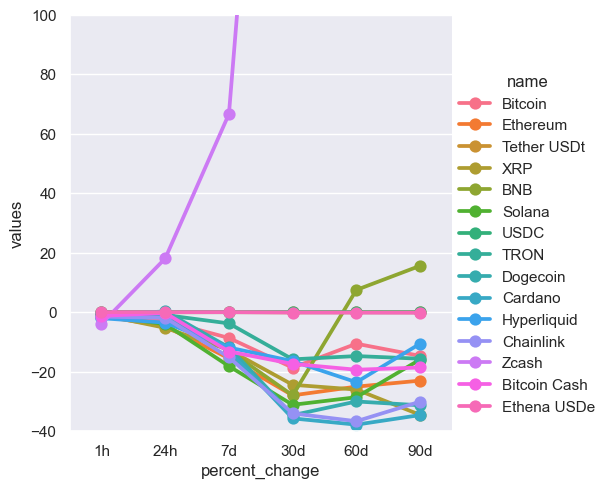

In [120]:
g = sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point' )
g.set(ylim=(-40, 100))